In [1]:
import pandas as pd
import os
import numpy as np
import math
from matplotlib import pyplot as plt
from rdkit import Chem
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from utils import *
from plotting import *

In [2]:
matchms_scores = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.01_1%I_all_peaks_with_0s_only_matching.tsv", sep="\t")
matchms_scores = append_classes(matchms_scores, 'query')
df = normalize_df(append_spectrum_metadata(matchms_scores))

matches_col = 'CosineHungarian_0.01_0.0_1.0_matches'
scores_col = 'CosineHungarian_0.01_0.0_1.0_scores'

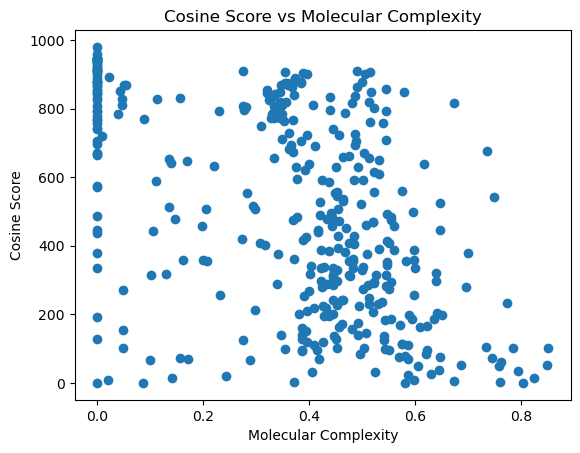

In [3]:
plt.scatter(df['molecular_flexibility'], df[scores_col])
plt.xlabel('Molecular Complexity')
plt.ylabel('Cosine Score')
plt.title('Cosine Score vs Molecular Complexity')
plt.show()

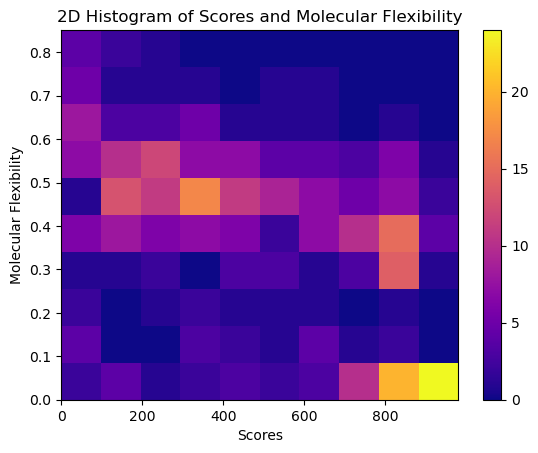

In [4]:
plt.hist2d(df[scores_col], df['molecular_flexibility'], bins=10, cmap='plasma')
plt.colorbar(label='')
plt.xlabel('Scores')
plt.ylabel('Molecular Flexibility')
plt.title('2D Histogram of Scores and Molecular Flexibility')
plt.show()

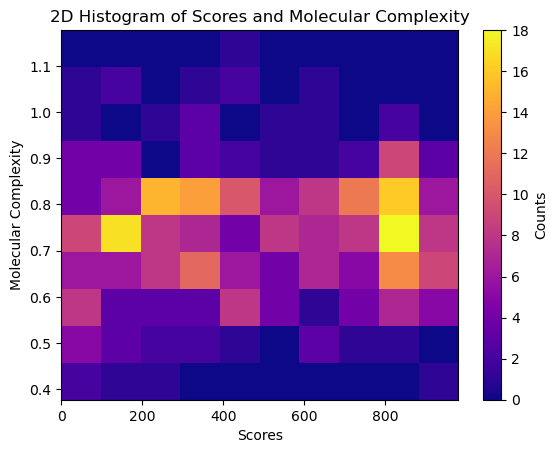

In [5]:
plt.hist2d(df[scores_col], df['molecular_complexity'], bins=10, cmap='plasma')
plt.colorbar(label='Counts')
plt.xlabel('Scores')
plt.ylabel('Molecular Complexity')
plt.title('2D Histogram of Scores and Molecular Complexity')
plt.show()

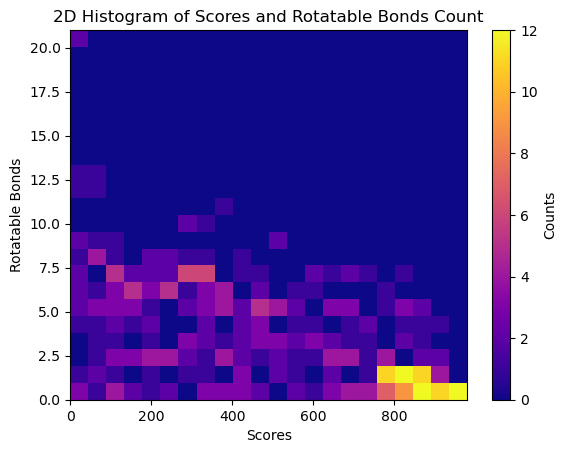

In [6]:
plt.hist2d(df[scores_col], df['rotatable_bonds'], bins=22, cmap='plasma')
plt.colorbar(label='Counts')
plt.xlabel('Scores')
plt.ylabel('Rotatable Bonds')
plt.title('2D Histogram of Scores and Rotatable Bonds Count')
plt.show()

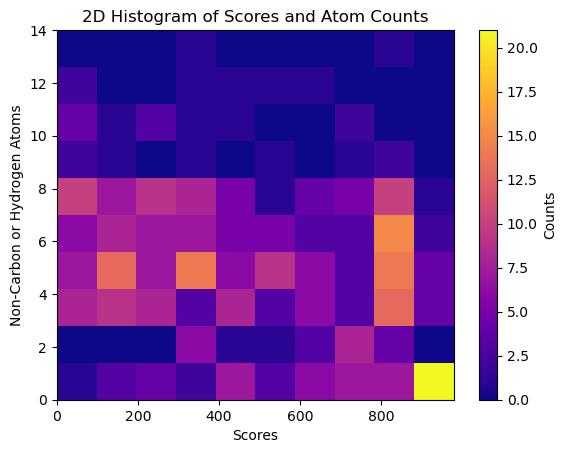

In [7]:
plt.hist2d(df[scores_col], df['non_ch_atoms'], bins=10, cmap='plasma')
plt.colorbar(label='Counts')
plt.xlabel('Scores')
plt.ylabel('Non-Carbon or Hydrogen Atoms')
plt.title('2D Histogram of Scores and Atom Counts')
plt.show()

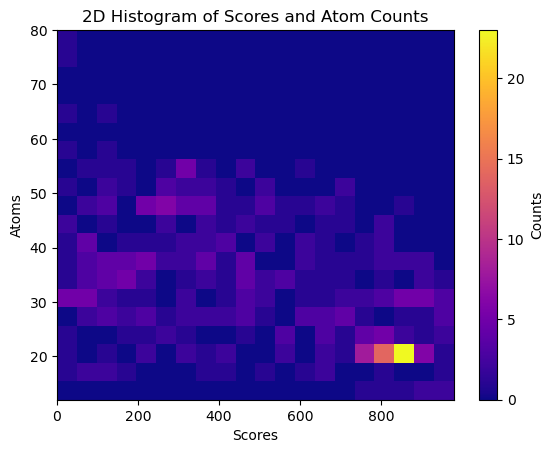

In [8]:
plt.hist2d(df[scores_col], df['n_atoms'], bins=20, cmap='plasma')
plt.colorbar(label='Counts')
plt.xlabel('Scores')
plt.ylabel('Atoms')
plt.title('2D Histogram of Scores and Atom Counts')
plt.show()

In [9]:
import scipy.stats as stats

stats.pearsonr(df['molecular_flexibility'].astype(float), df[scores_col].astype(float))

PearsonRResult(statistic=-0.49581481744818046, pvalue=4.940303895725461e-25)

In [10]:
df.rename(columns={'CosineHungarian_0.01_0.0_1.0_scores': 'scores'}, inplace=True)
df.rename(columns={'CosineHungarian_0.01_0.0_1.0_matches': 'matches'}, inplace=True)
del df['peak_comments']

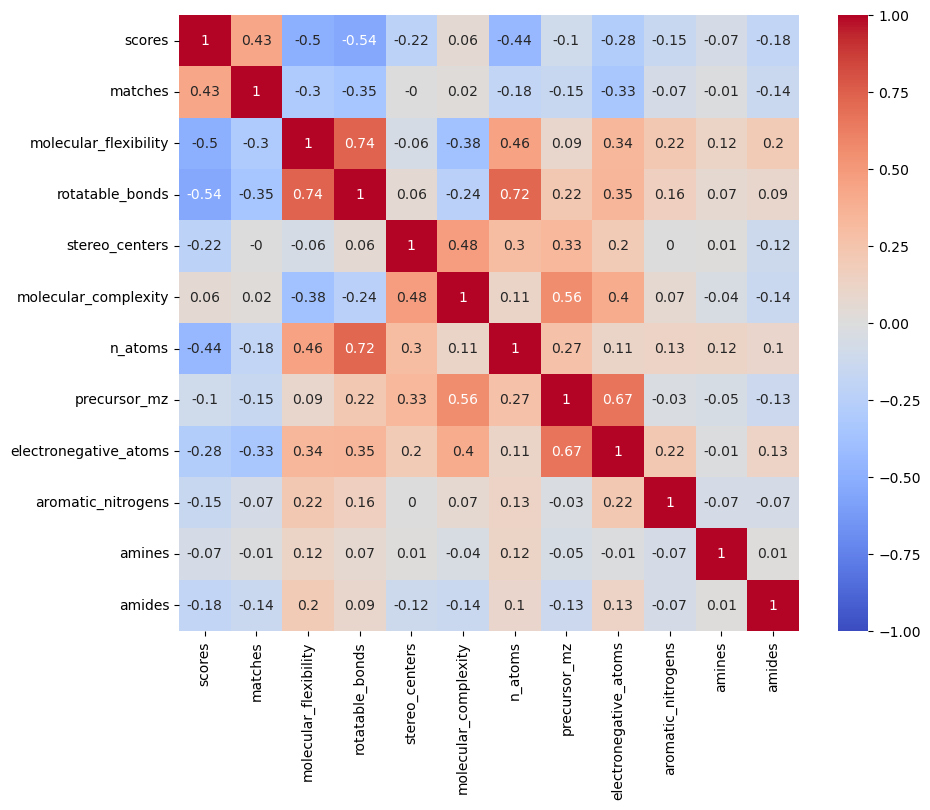

In [11]:
properties = [
    'scores',
    'matches',
    'molecular_flexibility',
    'rotatable_bonds',
    'stereo_centers',
    'molecular_complexity',
    'n_atoms',
    'precursor_mz',
    'electronegative_atoms',
    'aromatic_nitrogens',
    'amines',
    'amides',
]

# Assuming `df` is your DataFrame
corr = df[properties].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
# plt.title('Pearson Correlations')
plt.show()

In [12]:
means = df[properties + ["class"]].groupby('class').mean()
means.to_csv('class_means.csv')

In [13]:
p_means = df[properties + ["P"]].groupby('P').mean()